In [1]:
import pandas as pd
import glob
file_paths = glob.glob("Wine_Stats/*.csv")
dataframes = [pd.read_csv(file) for file in file_paths]

In [2]:
wine_df = pd.concat(dataframes, ignore_index=True)
print(f"Combined DataFrame Shape: {wine_df.shape}")
print(wine_df.head())

Combined DataFrame Shape: (5145, 15)
   Unnamed: 0                                       Name  Rating  \
0           0                  Fields Of Joy Shiraz 2014     4.0   
1           1                          Shotfire GSM 2018     3.9   
2           2                  Passion has Red Lips 2020     3.8   
3           3   The Hermit Crab Viognier - Marsanne 2018     3.8   
4           4  Cabernet Sauvignon (Batch No. 1 & 3) 2019     3.8   

   Number of Ratings  Price  \
0                203  28.99   
1                 36  19.49   
2                350  27.50   
3               1026  16.99   
4                969  14.99   

                                              Region                  Winery  \
0  Australia / South Australia / Mount Lofty Rang...               Two Hands   
1              Australia / South Australia / Barossa            Thorn-Clarke   
2  Australia / South Australia / Fleurieu / McLar...        Some Young Punks   
3  Australia / South Australia / Fleurieu / McL

In [4]:
print(wine_df.info()) #Gives an overview of the DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5145 entries, 0 to 5144
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         5145 non-null   int64  
 1   Name               5145 non-null   object 
 2   Rating             5145 non-null   float64
 3   Number of Ratings  5145 non-null   int64  
 4   Price              5145 non-null   float64
 5   Region             5145 non-null   object 
 6   Winery             5142 non-null   object 
 7   Wine style         4624 non-null   object 
 8   Alcohol content    5145 non-null   float64
 9   Grapes             2977 non-null   object 
 10  Food pairings      5145 non-null   object 
 11  Bold               5145 non-null   float64
 12  Tannin             5145 non-null   float64
 13  Sweet              5145 non-null   float64
 14  Acidic             5145 non-null   float64
dtypes: float64(7), int64(2), object(6)
memory usage: 603.1+ KB
None


In [18]:
print(wine_df.dtypes) #Gives only the data types of each column in the DataFrame

Unnamed: 0             int64
Name                  object
Rating               float64
Number of Ratings      int64
Price                float64
Region                object
Winery                object
Wine style            object
Alcohol content      float64
Grapes                object
Food pairings         object
Bold                 float64
Tannin               float64
Sweet                float64
Acidic               float64
dtype: object


In [5]:
print(wine_df.describe())  #Gives a summary of the statistical properties of the numerical columns in the DataFrame

        Unnamed: 0       Rating  Number of Ratings        Price  \
count  5145.000000  5145.000000        5145.000000  5145.000000   
mean    503.271914     4.000292         601.032653    27.424618   
std     406.492427     0.157726        2725.500208    10.645818   
min       0.000000     3.700000          25.000000     6.500000   
25%     164.000000     3.900000          73.000000    19.980000   
50%     377.000000     4.000000         189.000000    25.990000   
75%     790.000000     4.100000         483.000000    34.000000   
max    1436.000000     4.600000      159937.000000   155.000000   

       Alcohol content         Bold       Tannin        Sweet       Acidic  
count      5145.000000  5145.000000  5145.000000  5145.000000  5145.000000  
mean         13.794363    57.990384    46.293535    12.259602    54.096125  
std           1.242644    19.081310    11.092394    12.306948    14.463969  
min           5.000000     0.060000     1.400000     0.010000     7.230000  
25%        

In [6]:
#Task2_Part2_2.Remove any duplicate records
wine_df = wine_df.drop_duplicates()

In [7]:
#removing null records
print(wine_df.isnull().sum())
wine_df = wine_df.dropna()

Unnamed: 0              0
Name                    0
Rating                  0
Number of Ratings       0
Price                   0
Region                  0
Winery                  3
Wine style            521
Alcohol content         0
Grapes               2168
Food pairings           0
Bold                    0
Tannin                  0
Sweet                   0
Acidic                  0
dtype: int64


In [8]:
#Task 02 - 3. Handle outliers and missing values

Q1 = wine_df['Price'].quantile(0.25)
Q3 = wine_df['Price'].quantile(0.75)
IQR = Q3 - Q1
upper_threshold = Q3 + 1.5 * IQR 



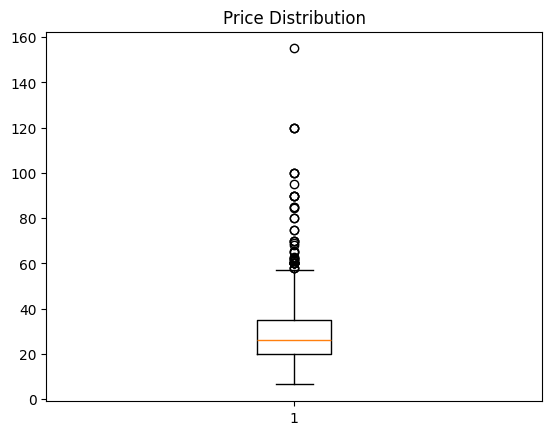

In [9]:
import matplotlib.pyplot as plt
plt.boxplot(wine_df['Price'])
plt.title("Price Distribution")
plt.show()

wine_df = wine_df[wine_df['Price'] < upper_threshold]
wine_df.fillna({'Price':wine_df['Price'].mean()},inplace=True)

#Reasons for handling outliers and missing values.
#Missing values reduces data quality and introducing bias.
#The column or rows remove when a column has too many missing values.

In [10]:
#Task2_part4_Adding new columns to the data frame
#Country
wine_df['Country'] = wine_df['Region'].apply(lambda x: x.split('/')[0].strip())
print(wine_df.head())

   Unnamed: 0                       Name  Rating  Number of Ratings  Price  \
1           1          Shotfire GSM 2018     3.9                 36  19.49   
5           5  Passion has Red Lips 2014     3.8                648  18.49   
7           7         Jester Shiraz 2018     3.9                658  22.00   
8           8     Shotfire Quartage 2016     3.8                 93  17.99   
9           9     Stonehorse Shiraz 2018     4.0                288  29.17   

                                              Region            Winery  \
1              Australia / South Australia / Barossa      Thorn-Clarke   
5  Australia / South Australia / Fleurieu / McLar...  Some Young Punks   
7  Australia / South Australia / Fleurieu / McLar...            Mitolo   
8              Australia / South Australia / Barossa      Thorn-Clarke   
9  Australia / South Australia / Barossa / Baross...           Kaesler   

                     Wine style  Alcohol content  \
1    Australian Rhône Blend Red   

In [11]:
#Task2_part4_Adding new columns to the data frame
#2.Country_region
wine_df['Country_Region'] = wine_df['Region'].apply(lambda x: x.split(' / ')[1] if ' / ' in x else None)
print(wine_df.head())



   Unnamed: 0                       Name  Rating  Number of Ratings  Price  \
1           1          Shotfire GSM 2018     3.9                 36  19.49   
5           5  Passion has Red Lips 2014     3.8                648  18.49   
7           7         Jester Shiraz 2018     3.9                658  22.00   
8           8     Shotfire Quartage 2016     3.8                 93  17.99   
9           9     Stonehorse Shiraz 2018     4.0                288  29.17   

                                              Region            Winery  \
1              Australia / South Australia / Barossa      Thorn-Clarke   
5  Australia / South Australia / Fleurieu / McLar...  Some Young Punks   
7  Australia / South Australia / Fleurieu / McLar...            Mitolo   
8              Australia / South Australia / Barossa      Thorn-Clarke   
9  Australia / South Australia / Barossa / Baross...           Kaesler   

                     Wine style  Alcohol content  \
1    Australian Rhône Blend Red   

In [14]:
#Task2_Part4_3. creating new variables to store each list element in the column “Food pairings”

wine_df['Food pairings'] = wine_df['Food pairings'].apply(lambda x: eval(x) if isinstance(x, str) else [])

# Get all unique food items
unique_foods = set(food for pairings in wine_df['Food pairings'] for food in pairings)

# Create new columns for each food item and populate with True/False
for food in unique_foods:
    wine_df[food] = wine_df['Food pairings'].apply(lambda x: food in x)

# Drop the original 'Food pairings' column as it's no longer needed
wine_df.drop(columns=['Food pairings'], inplace=True)

# Display the updated DataFrame structure and the first few rows
print(wine_df.info())
print(wine_df.head())

<class 'pandas.core.frame.DataFrame'>
Index: 2931 entries, 1 to 5144
Data columns (total 38 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    2931 non-null   int64  
 1   Name                          2931 non-null   object 
 2   Rating                        2931 non-null   float64
 3   Number of Ratings             2931 non-null   int64  
 4   Price                         2931 non-null   float64
 5   Region                        2931 non-null   object 
 6   Winery                        2931 non-null   object 
 7   Wine style                    2931 non-null   object 
 8   Alcohol content               2931 non-null   float64
 9   Grapes                        2931 non-null   object 
 10  Bold                          2931 non-null   float64
 11  Tannin                        2931 non-null   float64
 12  Sweet                         2931 non-null   float64
 13  Acidic  

In [15]:
#Task2_Part5_Column Removal
columns_to_drop = ['Unnamed: 0', 'Region', 'Grapes', 'Wine style']
wine_df_cleaned = wine_df.drop(columns=columns_to_drop)

wine_df_cleaned.info() 

#reasons
#The Unnamed column is an index from the original dataset, which is redundant as pandas already uses its own index.
#The Region column is no longer needed after extracting Country and Country_region.
#Grapes and Wine style columns have some missing values.

<class 'pandas.core.frame.DataFrame'>
Index: 2931 entries, 1 to 5144
Data columns (total 34 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Name                          2931 non-null   object 
 1   Rating                        2931 non-null   float64
 2   Number of Ratings             2931 non-null   int64  
 3   Price                         2931 non-null   float64
 4   Winery                        2931 non-null   object 
 5   Alcohol content               2931 non-null   float64
 6   Bold                          2931 non-null   float64
 7   Tannin                        2931 non-null   float64
 8   Sweet                         2931 non-null   float64
 9   Acidic                        2931 non-null   float64
 10  Country                       2931 non-null   object 
 11  Country_Region                2927 non-null   object 
 12  Pasta                         2931 non-null   bool   
 13  Poultry 

In [16]:
# Save the cleaned DataFrame to a CSV file
wine_df_cleaned.to_csv('preprocessed_wine_data.csv', index=False)